                                                                                            Hurgland-Nick KELIET

In [1]:
#Import des Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Empêcher les warnings
import warnings
warnings.filterwarnings('ignore')


# Import Outils machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import du dataset
df = load_boston()

# Affichons les valeurs
print(df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


 - data : Données concernant les maisons 
 - target : Le prix de la maison
 - feature_names DESCR : Nom des catégories dans DESCR

In [3]:
# Puisque nous ne pouvons pas utiliser notre dataset avec Pandas, convertissons le en DataFrame
boston_df = pd.DataFrame(df.data, columns = df.feature_names)

In [4]:
# Vérifions la colonnes data et Feature
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Vérifions la colonnes DESCR
# print(df.DESCR)
# On vient de voir que cela nous nous sera d'aucune utilité

# Ajoutons le prix à notre tableau puis checkons
boston_df['prix'] = df.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prix
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Les variables dépendantes
# 'RM' et 'LSTAT' sont mes variables de la régression linéaire
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns=['LSTAT','RM'])

# La variable indépendantes (Target)
Y = boston_df['prix']

In [7]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


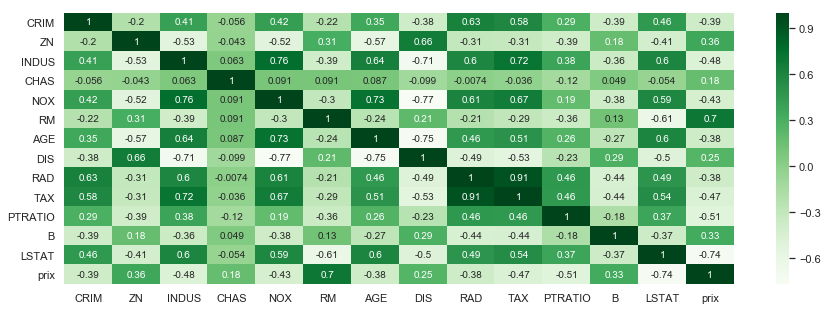

In [8]:
# Corrélation des données 
boston_corr = boston_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(boston_corr, cmap="Greens", annot=True,)

<Figure size 1800x1080 with 0 Axes>

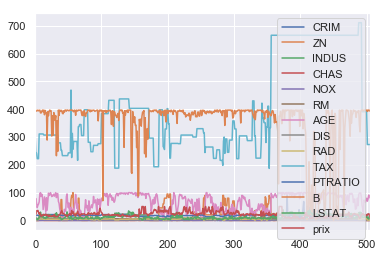

In [9]:
# Visualistion de nos données
plt.figure(figsize = (25,15))
boston_df.plot()

# Le Dataset 

In [10]:
# Séparons notre data
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 8)

# Prédiction : Linear Regression

In [11]:
# Créons une instance du modèle
linear_reg_mod = LinearRegression()
# Entrainons notre nodèle
linear_reg_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Appelons notre prédiction ( modèle pour la production)
y_pred = linear_reg_mod.predict(X_test)

### Les metrics

In [13]:
# RMSE
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print("rmse:", rmse)

# R2 score
r2_score = r2_score(y_test,y_pred)
print("r2_score:", r2_score)

rmse: 5.584917942787812
r2_score: 0.5790311580440943


- Score 

In [14]:
print("Le score est R2:", linear_reg_mod.score(X_train,y_train))

Le score est R2: 0.6494260373419554


# Prédiction : Gradient Boost Regressor

In [34]:
# Importy de la librairie Gboost
from sklearn.ensemble import GradientBoostingRegressor

# variable where we define our gradient boosting regressor and set parameters to it , here
# Fit regression model
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params)

In [35]:
# Entrainons notre modèle
clf.fit(X_train, y_train)

# Evaluons notre modèle Rsquare
print("Score R2 =", clf.score(X_train,y_train))

Score R2 = 0.7744929468883461


 On à améliorer l'accuracy de notre modèle

 -  Données test

In [36]:
y_pred_test = clf.predict(X_test)

In [37]:
clf.score(X_test,y_test)

0.6154787784414218

                                                                                                                FIN